# Course: Deep Learning
# Author: Sandro Camargo sandrocamargo@unipampa.edu.br
# MNIST Classification with Convolutional Neural Networks
# Dataset: '/content/sample_data/' mnist
# Dataset description: https://www.tensorflow.org/datasets/catalog/mnist


Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Defining image parameters

In [2]:
np.random.seed(1)
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

Loading dataset from google colab

In [3]:
data_path = "/content/sample_data/"
train_data = np.loadtxt(data_path + "mnist_train_small.csv", delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",") 

Scaling the inputs in [0,1] range and presenting the input and output dataset dimensions

In [4]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

Transforming arrays into images

In [5]:
train_imgs = train_imgs.reshape(20000, 28, 28, 1)
test_imgs = test_imgs.reshape(10000, 28, 28, 1)

Splitting inputs and outputs
Binarizing outputs


In [6]:
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])
print('The training dataset (input) dimensions are: ', train_imgs.shape)
print('The training dataset (output) dimensions are: ', train_labels.shape)
print('The testing dataset (input) dimensions are: ', test_imgs.shape)
print('The testing dataset (output) dimensions are: ',test_labels.shape)

train_labels_bin = label_binarize(train_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The training dataset (input) dimensions are:  (20000, 28, 28, 1)
The training dataset (output) dimensions are:  (20000, 1)
The testing dataset (input) dimensions are:  (10000, 28, 28, 1)
The testing dataset (output) dimensions are:  (10000, 1)


Inspecting the training set

Showing the first 20 samples and their labels

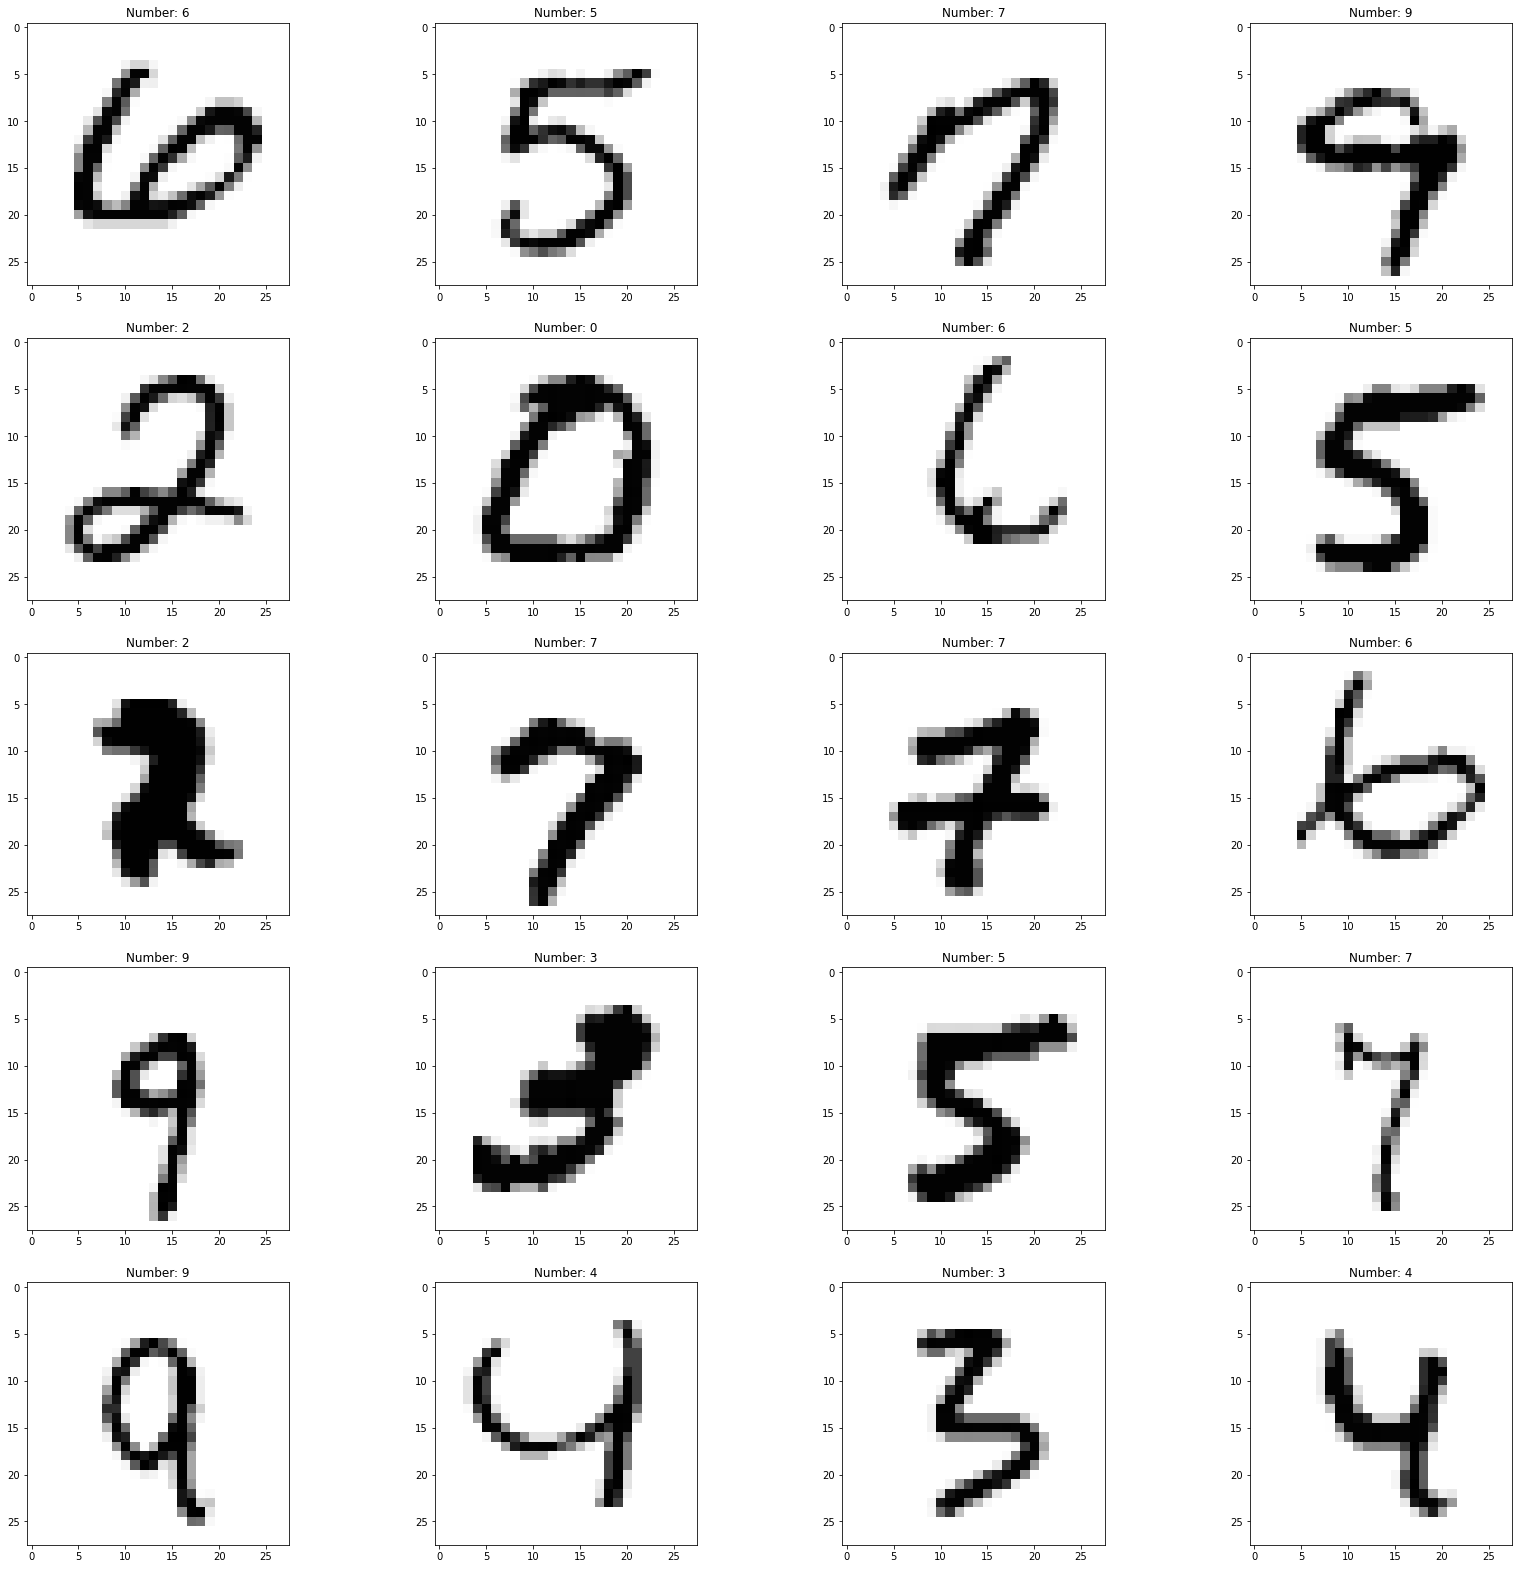

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(28, 28))

for i in range(5):
  for j in range(4):
    img = train_data[i*5+j,range(1,785)].reshape((28,28))
    ax[i,j].imshow(img, cmap="Greys")
    ax[i,j].title.set_text("Number: " + str(int(train_data[i*5+j,0])))
plt.show()

Creating and training the model


In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(24, (5, 5), strides = (1, 1), activation = 'relu', input_shape = (28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
  tf.keras.layers.Conv2D(24, (5, 5), strides = (1, 1), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(20, activation='relu'),  
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()

history = model.fit(
    train_imgs, train_labels_bin, 
    epochs=20, verbose=1, batch_size=64, 
    validation_split=0.2
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 24)        624       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 24)          14424     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 24)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dropout (Dropout)           (None, 384)               0

Plotting the loss function on training and validation set.

The best value for epochs is when the validation loss starts to increase.

---



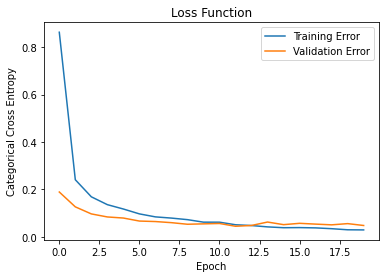

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Error','Validation Error'], loc='upper right')
plt.savefig("trainingerror.pdf")
plt.show()

Plotting the classification accuracy on training and validation sets

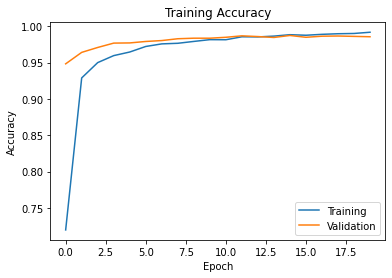

Training Categorical Accuracy: 0.9917
Validation Categorical Accuracy: 0.9855


In [10]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training','Validation'], loc='lower right')
plt.savefig("trainingaccuracy.pdf")
plt.show()
print("Training Categorical Accuracy:", round(history.history['categorical_accuracy'][-1],4))
print("Validation Categorical Accuracy:", round(history.history['val_categorical_accuracy'][-1],4))

Evaluates performance on test set
Presents the classification accuracy

In [11]:
scores = model.evaluate(
    test_imgs, test_labels_bin, verbose=1
)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 3s 10ms/step - loss: 0.0434 - categorical_accuracy: 0.9889
categorical_accuracy: 98.89%


Summarizing the performance on training set


In [12]:
test_predictions = model.predict(test_imgs)
print(confusion_matrix(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1)))
print(classification_report(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1), target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

313/313 [==============================] - 3s 9ms/step
[[ 970    0    0    0    0    0    4    0    0    1]
 [   1 1131    0    0    0    0    3    1    0    0]
 [   2    1 1029    4    0    0    0   10    3    1]
 [   0    1    0  994    0    4    0    0    1    0]
 [   1    0    1    0  977    0    2    0    2    6]
 [   0    0    0    9    0  885    3    1    2    6]
 [   3    0    0    0    0    2  946    0    1    0]
 [   2    1    1    2    0    0    0 1013    2    5]
 [   1    1    1    0    0    0    0    1  959    5]
 [   0    0    0    1    5    1    0    2    4  985]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       975
           1       1.00      1.00      1.00      1136
           2       1.00      0.98      0.99      1050
           3       0.98      0.99      0.99      1000
           4       0.99      0.99      0.99       989
           5       0.99      0.98      0.98       906
           6       0.99      0.99  

Confusion Matrix Heatmap

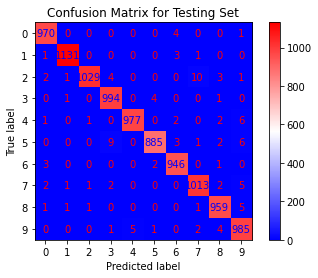

In [13]:
cm = confusion_matrix(test_predictions.argmax(axis=1), test_labels_bin.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
disp.plot(cmap="bwr")
plt.title('Confusion Matrix for Testing Set')
plt.savefig("confusionmatrix.pdf")
plt.show()

Reporting some misclassified samples 

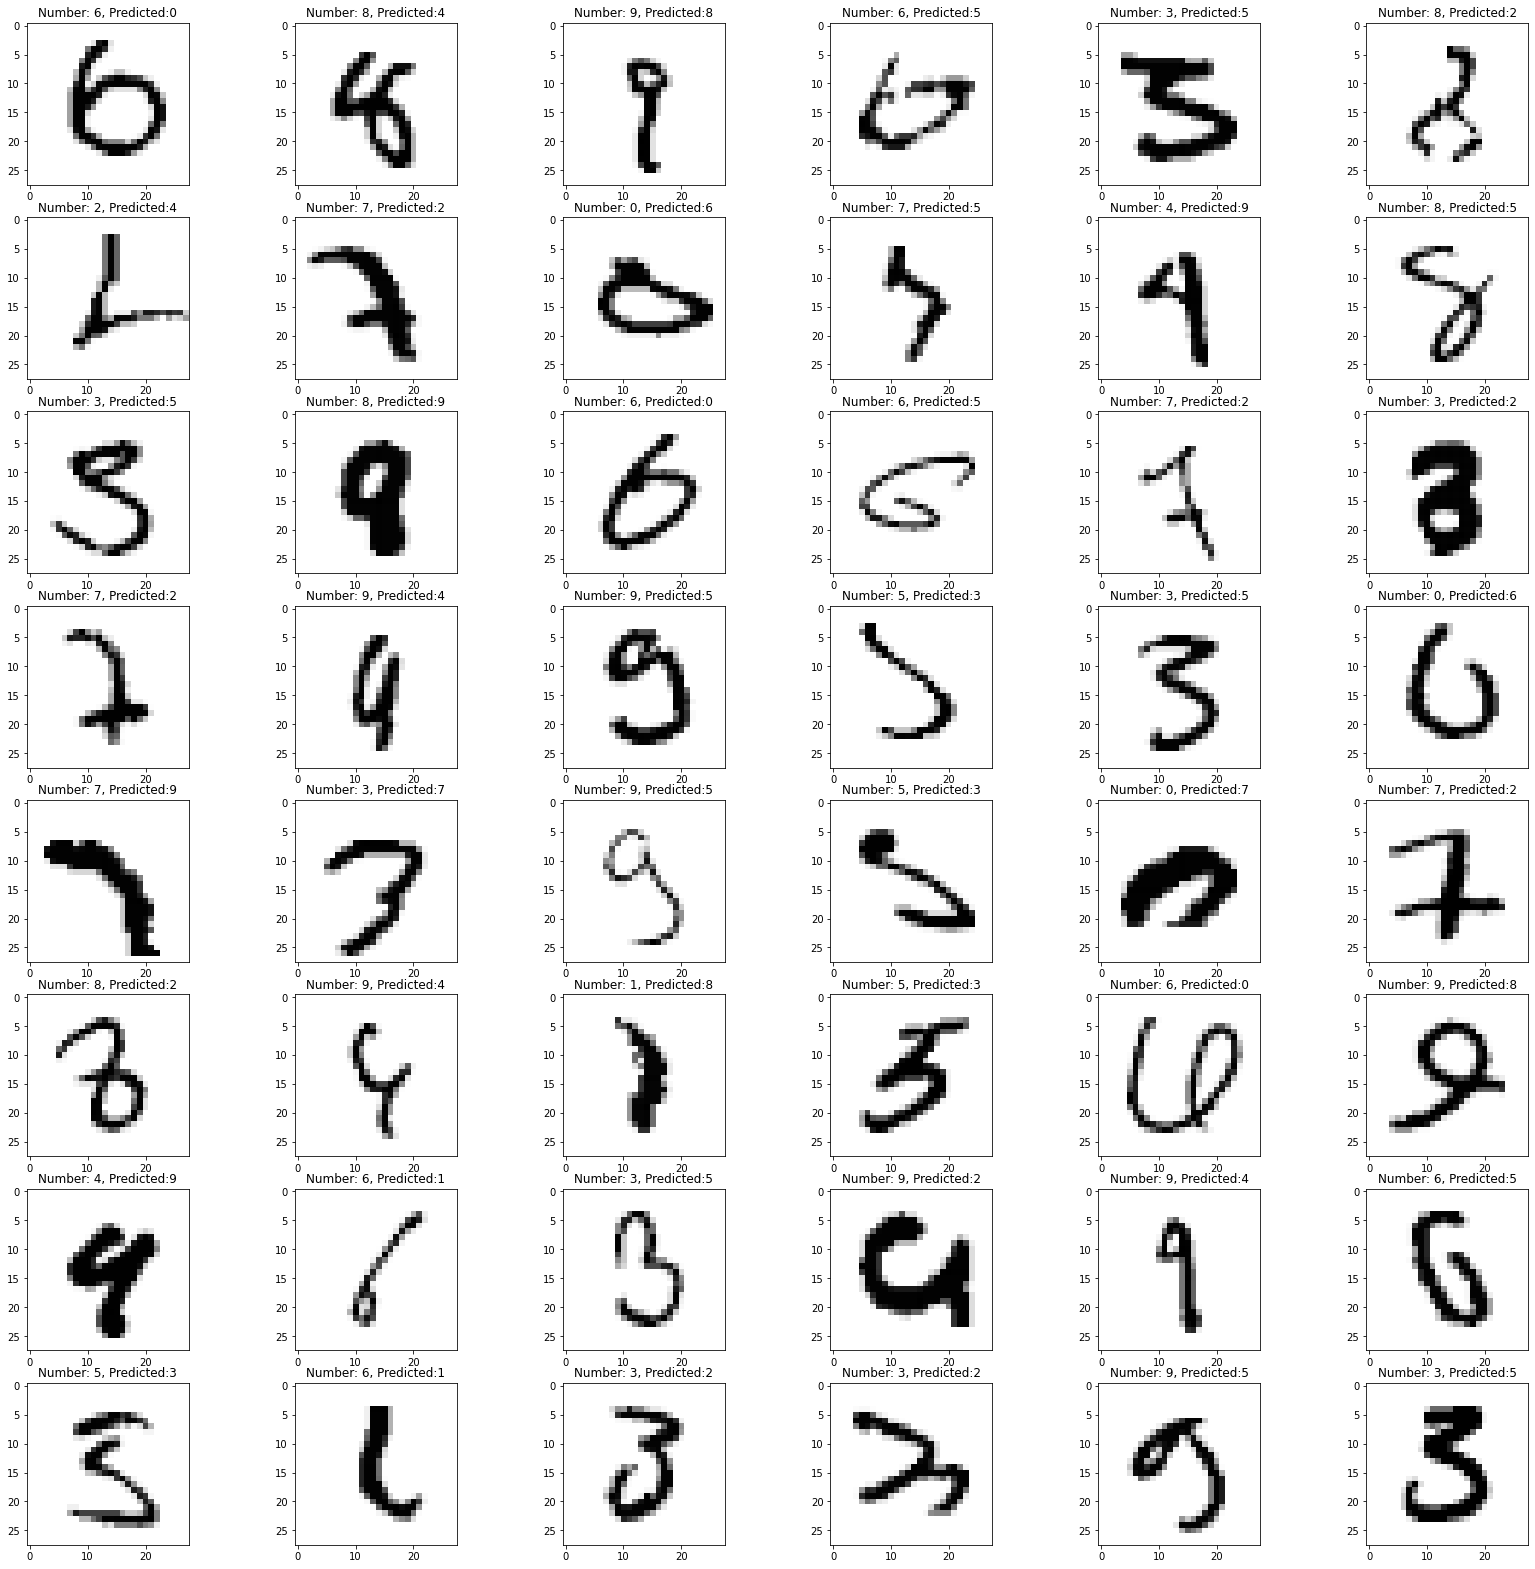

In [14]:
i = 0
j = -1

fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(28, 28))

for k in range(5000):
  if test_predictions.argmax(axis=1)[k]!=test_labels_bin.argmax(axis=1)[k]:
      if i==8:
         break
      j = j + 1
      img = test_data[k,range(1,785)].reshape((28,28))
      ax[i,j].imshow(img, cmap="Greys")
      ax[i,j].title.set_text("Number: " + str(int(test_data[k,0])) + ", Predicted:" + str(test_predictions.argmax(axis=1)[k]))
      if j>4:
         j = -1
         i = i + 1
plt.show()

In [21]:
kernels = model.layers[0].kernel
print(kernels)
print(kernels[1,1])

<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 24) dtype=float32, numpy=
array([[[[ 0.25103647, -0.10122179,  0.00390648, -0.16632381,
          -0.00238354, -0.03859133,  0.0246286 , -0.05674233,
          -0.09376992,  0.09473731,  0.1502025 ,  0.12220094,
          -0.01026607,  0.0521291 , -0.0293289 ,  0.16838004,
          -0.10712385,  0.04728958, -0.02274235, -0.16783018,
          -0.0486637 , -0.05329327,  0.02071461, -0.00054358]],

        [[ 0.20474692,  0.07323053, -0.06940021, -0.18447605,
           0.01532281, -0.06489282,  0.23777997, -0.23683996,
          -0.00384737, -0.22598481,  0.11002342,  0.18248236,
           0.18845041, -0.18889019, -0.21259066, -0.02650693,
          -0.13573498, -0.00983477, -0.08637543,  0.03193248,
           0.11243378,  0.13034733, -0.08488064, -0.13765828]],

        [[ 0.18929617,  0.00447632, -0.07641683,  0.12325234,
           0.1111926 , -0.03581038,  0.24814361,  0.07900772,
           0.06736212, -0.30278546,  0.21124427,  0.2